Expected Return and Volatility based on forecasts:


,Expected Return,Volatility
SYNE3.SA,0.248846,0.167426
PLPL3.SA,0.096393,0.090892
CMIN3.SA,0.068711,0.249244
SOND6.SA,-0.222050,0.207590
WHRL3.SA,0.012454,0.212522
DIRR3.SA,0.204150,0.030686


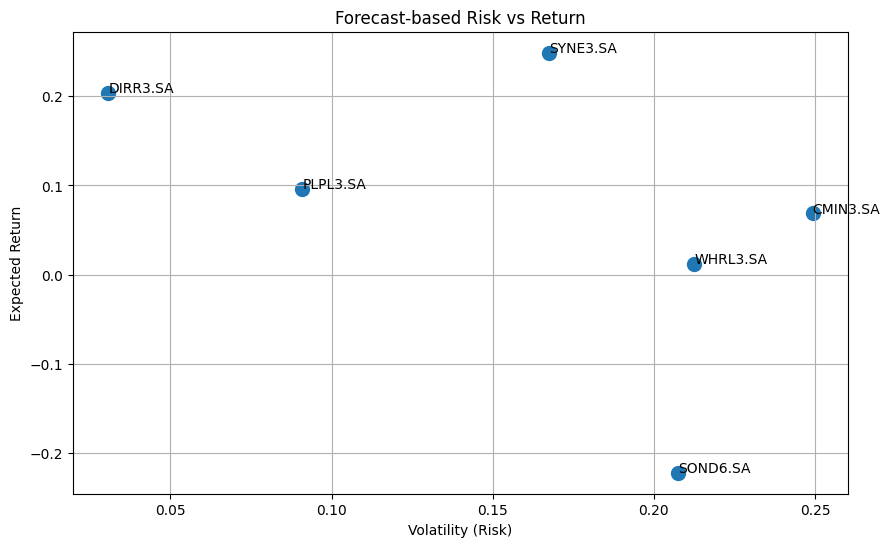

Equal-weighted portfolio expected return: 6.81%
Equal-weighted portfolio risk: 7.22%


In [1]:
# 05_forecast_returns_optimization.ipynb
# Author: André Lopes Marinho
# Description:
# Uses Prophet forecast data to estimate expected returns and build an optimized portfolio.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Step 1: Define tickers and load forecasts
tickers = ['SYNE3.SA', 'PLPL3.SA', 'CMIN3.SA', 'SOND6.SA', 'WHRL3.SA', 'DIRR3.SA']
forecast_dir = '../data/'

returns = {}
risks = {}

# Step 2: Extract expected return and risk from forecast
for ticker in tickers:
    file_path = os.path.join(forecast_dir, f'forecast_{ticker}.csv')
    if not os.path.exists(file_path):
        print(f"File not found for {ticker}, skipping.")
        continue

    df = pd.read_csv(file_path, parse_dates=['ds'])

    # Use only the future forecast period
    forecast_future = df[df['ds'] > df['ds'].max() - pd.Timedelta(days=180)]
    
    # Calculate expected return from yhat
    future_returns = forecast_future['yhat'].pct_change().dropna()
    mean_return = future_returns.mean() * 252  # annualized
    volatility = future_returns.std() * np.sqrt(252)  # annualized

    if np.isnan(mean_return) or np.isnan(volatility):
        print(f"Invalid forecast for {ticker}, skipping.")
        continue

    returns[ticker] = mean_return
    risks[ticker] = volatility

# Step 3: Create DataFrame for analysis
df_metrics = pd.DataFrame({
    'Expected Return': pd.Series(returns),
    'Volatility': pd.Series(risks)
})

print("Expected Return and Volatility based on forecasts:")
display(df_metrics)

# Step 4: Plot risk vs. return
plt.figure(figsize=(10, 6))
plt.scatter(df_metrics['Volatility'], df_metrics['Expected Return'], s=100)

for ticker in df_metrics.index:
    plt.annotate(ticker, (df_metrics.loc[ticker, 'Volatility'], df_metrics.loc[ticker, 'Expected Return']))

plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.title('Forecast-based Risk vs Return')
plt.grid(True)
plt.show()

# Step 5: Simulate equal-weighted portfolio (or build optimizer later)
equal_weights = np.ones(len(df_metrics)) / len(df_metrics)
portfolio_return = np.dot(equal_weights, df_metrics['Expected Return'])
portfolio_risk = np.sqrt(np.dot(equal_weights.T, np.dot(np.diag(df_metrics['Volatility'] ** 2), equal_weights)))

print(f"Equal-weighted portfolio expected return: {portfolio_return:.2%}")
print(f"Equal-weighted portfolio risk: {portfolio_risk:.2%}")
